## Problem Statement :
	
	A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years. 


## Project Objective :

	The objective of this project is to find out patterns and insight from the data provided that can be helpfull for different stores to improve in various fields, and to build predictive model to predict sales for given number of weeks.


### Data Description :

	We have been provided with a csv file with 6435 rows and 8 features/columns. The features provided in the data are as follows.

* `Store` : This column has the different store numbers stored which can be used to identify different stores.
* `Date` : Date of the Week on which the data was recorded
* `Weekly_Sales` : A cumulative figure of sales in dollar of a particular week.
* `Holiday_Flag` : This column describes if the given week was a holiday week or not.
* `Temperature` : Average temperature of the city in the week.
* `Fuel_Price` : Average Fuel price in the week.
* `CPI` : The Consumer Price Index measures the overall change in consumer prices based on a representative basket of goods and services over time.
* `Unemployment` : This is the sum of the unemployed who are willing to work and are actively looking for a job and the unemployed who are willing to work and are not actively looking for a job. 


## Data Pre-processing Steps and Inspiration

The Data once it is loaded

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Walmart.csv',parse_dates=['Date'])
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


Information of the data , like the type of variables and count of observations, The Date column dtype as been changed to datetime64 from the original data

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


Infrential Statistics of all the numeric columns in the data.
- Weekly_sales columns values and range are very large as compared to the other columns.
- The mean of Holiday Flag is very less which means that there are very less holiday weeks in the data in comparison to non - holiday weeks.
- Maximum temperature amy region as endured is 100 degrees.

In [162]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [163]:
print('Range of the Weekly_Sales Column')
int(data.Weekly_Sales.max()) - int(data.Weekly_Sales.min())

Range of the Weekly_Sales Column


3608700

Skewness is present in distribution of datapoints for all the features, 
- Weekly_sales is slightly positive/right skewed
- Temperature is slightly negative/left skewed
- Fuel_price is slightly negative/left skewed
- CPI is slightly positive/right skewed
- Unemployment is heavily positive/right skewed

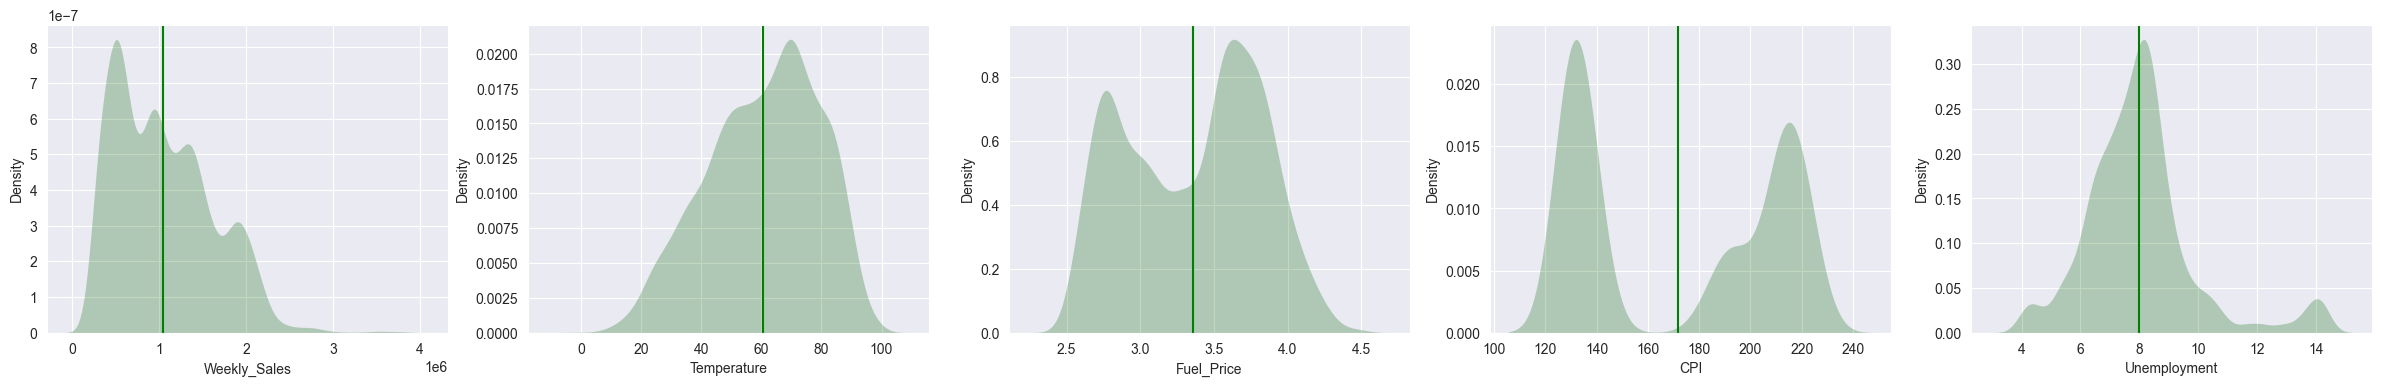

In [164]:
column = data.columns
column = column.delete(0)
column = column.delete(0)
column = column.delete(1)
sns.set_style('darkgrid')
plt.subplots(1,5,figsize = (30,4))
for index,col in enumerate(column):
    plt.subplot(1,5,index+1)
    sns.kdeplot(data[col],fill=True,linewidth = 0,color = 'darkgreen')
    plt.axvline(data[col].mean(),color = 'green')

In [165]:
for index,col in enumerate(column):
    print(f"The skewness of {col} is : {data[col].skew()}")

The skewness of Weekly_Sales is : 0.6683617974864524
The skewness of Temperature is : -0.3367676011075799
The skewness of Fuel_Price is : -0.09615830011865549
The skewness of CPI is : 0.06349184988549494
The skewness of Unemployment is : 1.1881439334843265


There are outliers in Temperature and Unemployment columns rest of the columns do not have any outliers present in them We can see this clearly in the box plot there are multiple ways of dealing with the outliers 
- Capping the outliers with upper bound and lower bound
- Dropping the Outliers

Depending on the further exploration of data we can decide on which method to use to deal with the outliers.

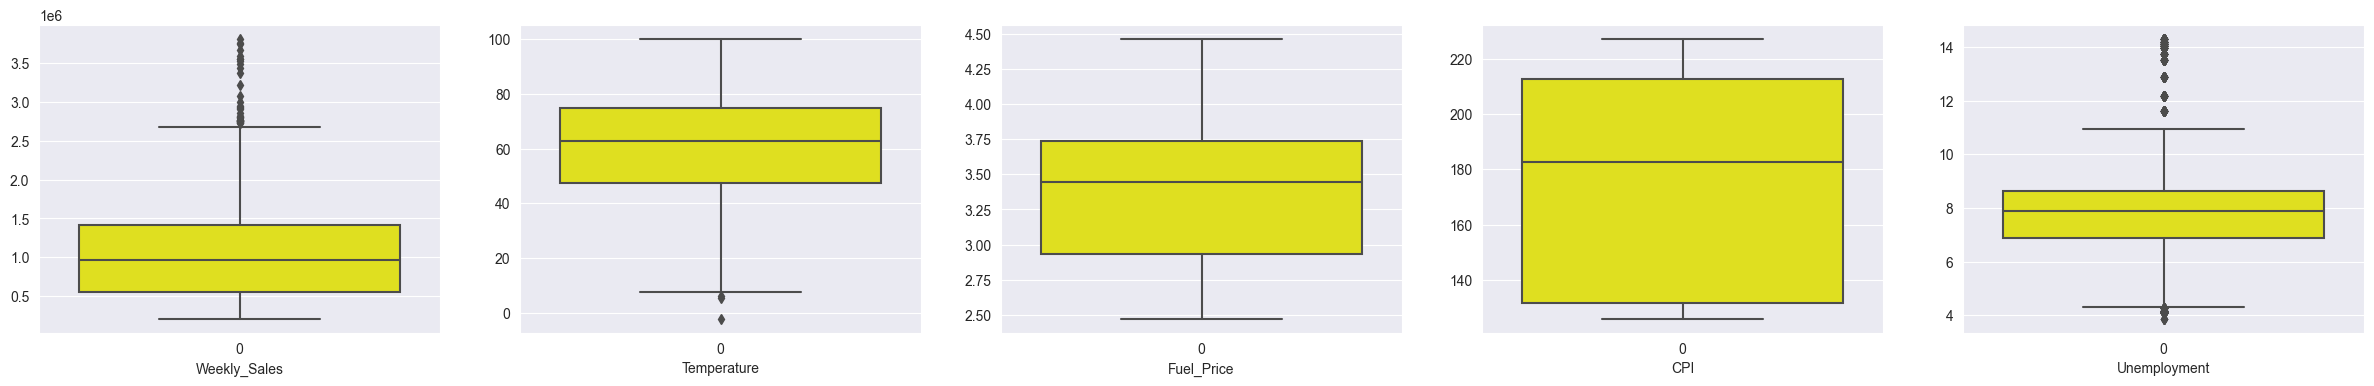

In [166]:
plt.subplots(1,5,figsize = (30,4))
for index,cols in enumerate(column):
    plt.subplot(1,5,index+1)
    sns.boxplot(data[cols],color='yellow')
    plt.xlabel(cols)

The distribution plot suggests that there are less holiday week as compared to non-holiday weeks in the data and the distribution of sales is not much different, 
- In holidays the total amount of sales is nearly around 0.5x1e^6 in maximum number of weeks.
- The max amount of sale in holidays is around 3.0x1e^6 and in non-holidays week is around 3.5x1e^6


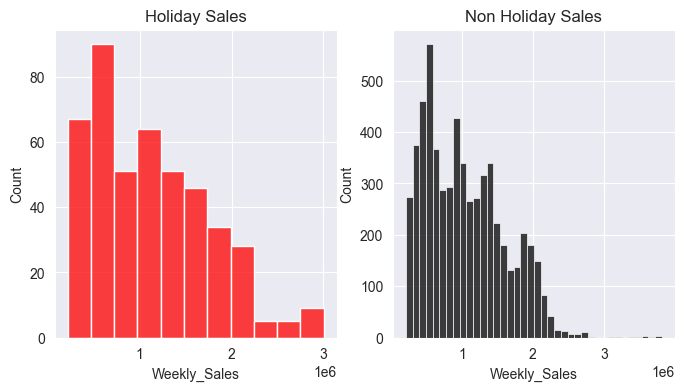

In [167]:
holiday_sales = data.loc[(data.Holiday_Flag == 1)]['Weekly_Sales']
non_holiday_sales = data.loc[(data.Holiday_Flag == 0)]['Weekly_Sales']

plt.subplots(1,2,figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(holiday_sales,color = 'red')
plt.title('Holiday Sales')
plt.subplot(1,2,2)
sns.histplot(non_holiday_sales,color = 'black')
plt.title('Non Holiday Sales')
plt.show()

The graph of feature weekly_sales as a function of t suggests that the amount of sales is higher near the holiday season and apart from it the sales remian in a certain range but this seasonality is only upto begining of the 2012 we cannot see any such seasonality/pattern for the year 2013 this implies that the data was not collected for the holiday week in the end of year 2012 the max sate that is present in the dataset.

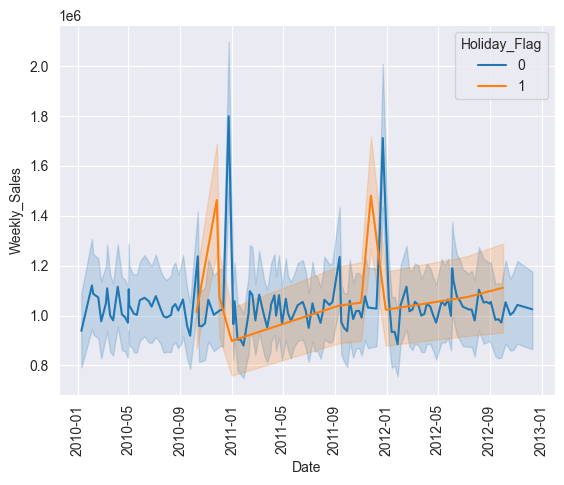

In [168]:
data['Date'] = data['Date'].astype('datetime64[ns]')
sns.lineplot(x = data['Date'],y = data['Weekly_Sales'],hue = data['Holiday_Flag'])
plt.xticks(rotation = 90)
plt.show()

In [169]:
print(f"The latest date available in the dataset is {data.Date.max()}")

The latest date available in the dataset is 2012-12-10 00:00:00


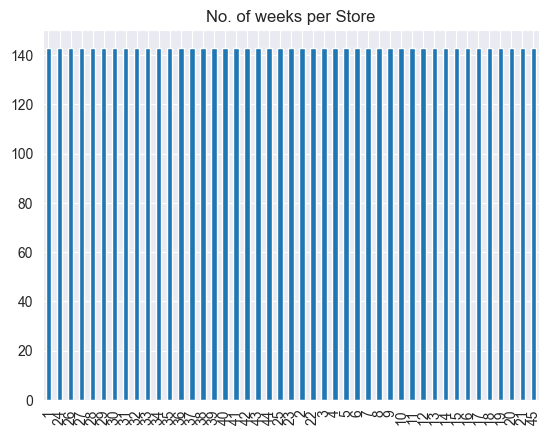

In [170]:
data.Store.value_counts().plot(kind = 'bar')
plt.title('No. of weeks per Store')
plt.show()

`In total we have data for 45 different stores, and for each store we have data of just 143 weeks which is around 2 years and three quarters of data`

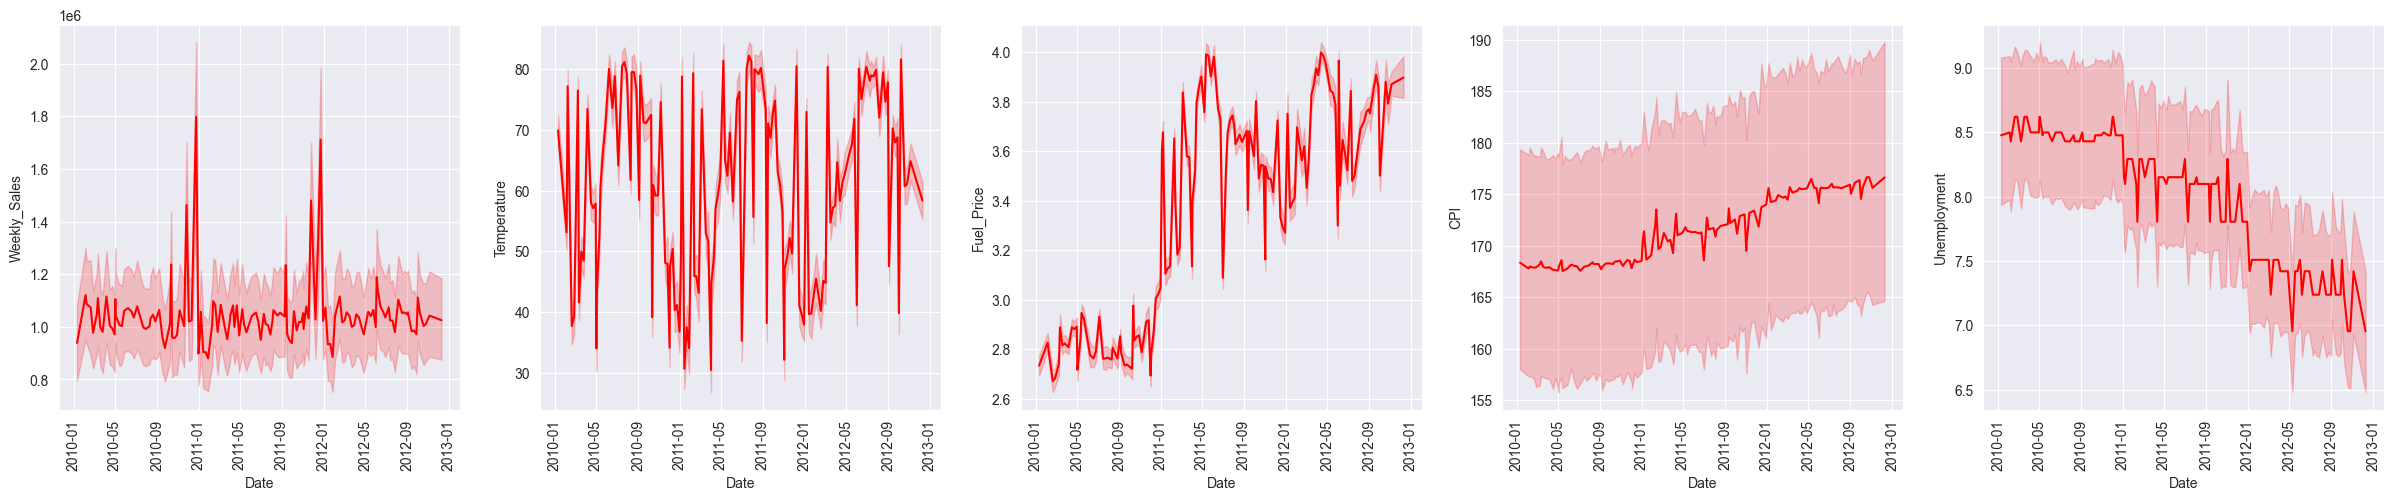

In [171]:
plt.subplots(1,5,figsize = (30,5))
for index,cols in enumerate(column):
    plt.subplot(1,5,index+1)
    sns.lineplot(y = data[cols],x=data['Date'],color='red')
    plt.xlabel('Date')
    plt.ylabel(cols)
    plt.xticks(rotation = 90)

- From above plots we can assume that all the different variables in this data are time series, that are recorded against a function of time t and we cannot see any kind of trend in the Weekly Sales, Temperature they are constant around a certain range, the temperature's range is very less as compared to Weekly sales.
- Variables, CPI and fuel price do show a positive trend where they increase with the time but also fuel price keeps on decreasing and increasing around a constant range.
- It is visible that as CPI is increasing fule price is also increasing beacuse of the positive trend that they follow, CPI is a varibale that is used to measure inflation and that inflation may be the cause of increase in fuel price but we cannot see from this plot that there is any effect of CPI on weekly sales.
- Unemployment rate follows a negative trend and is decreasing with the time.

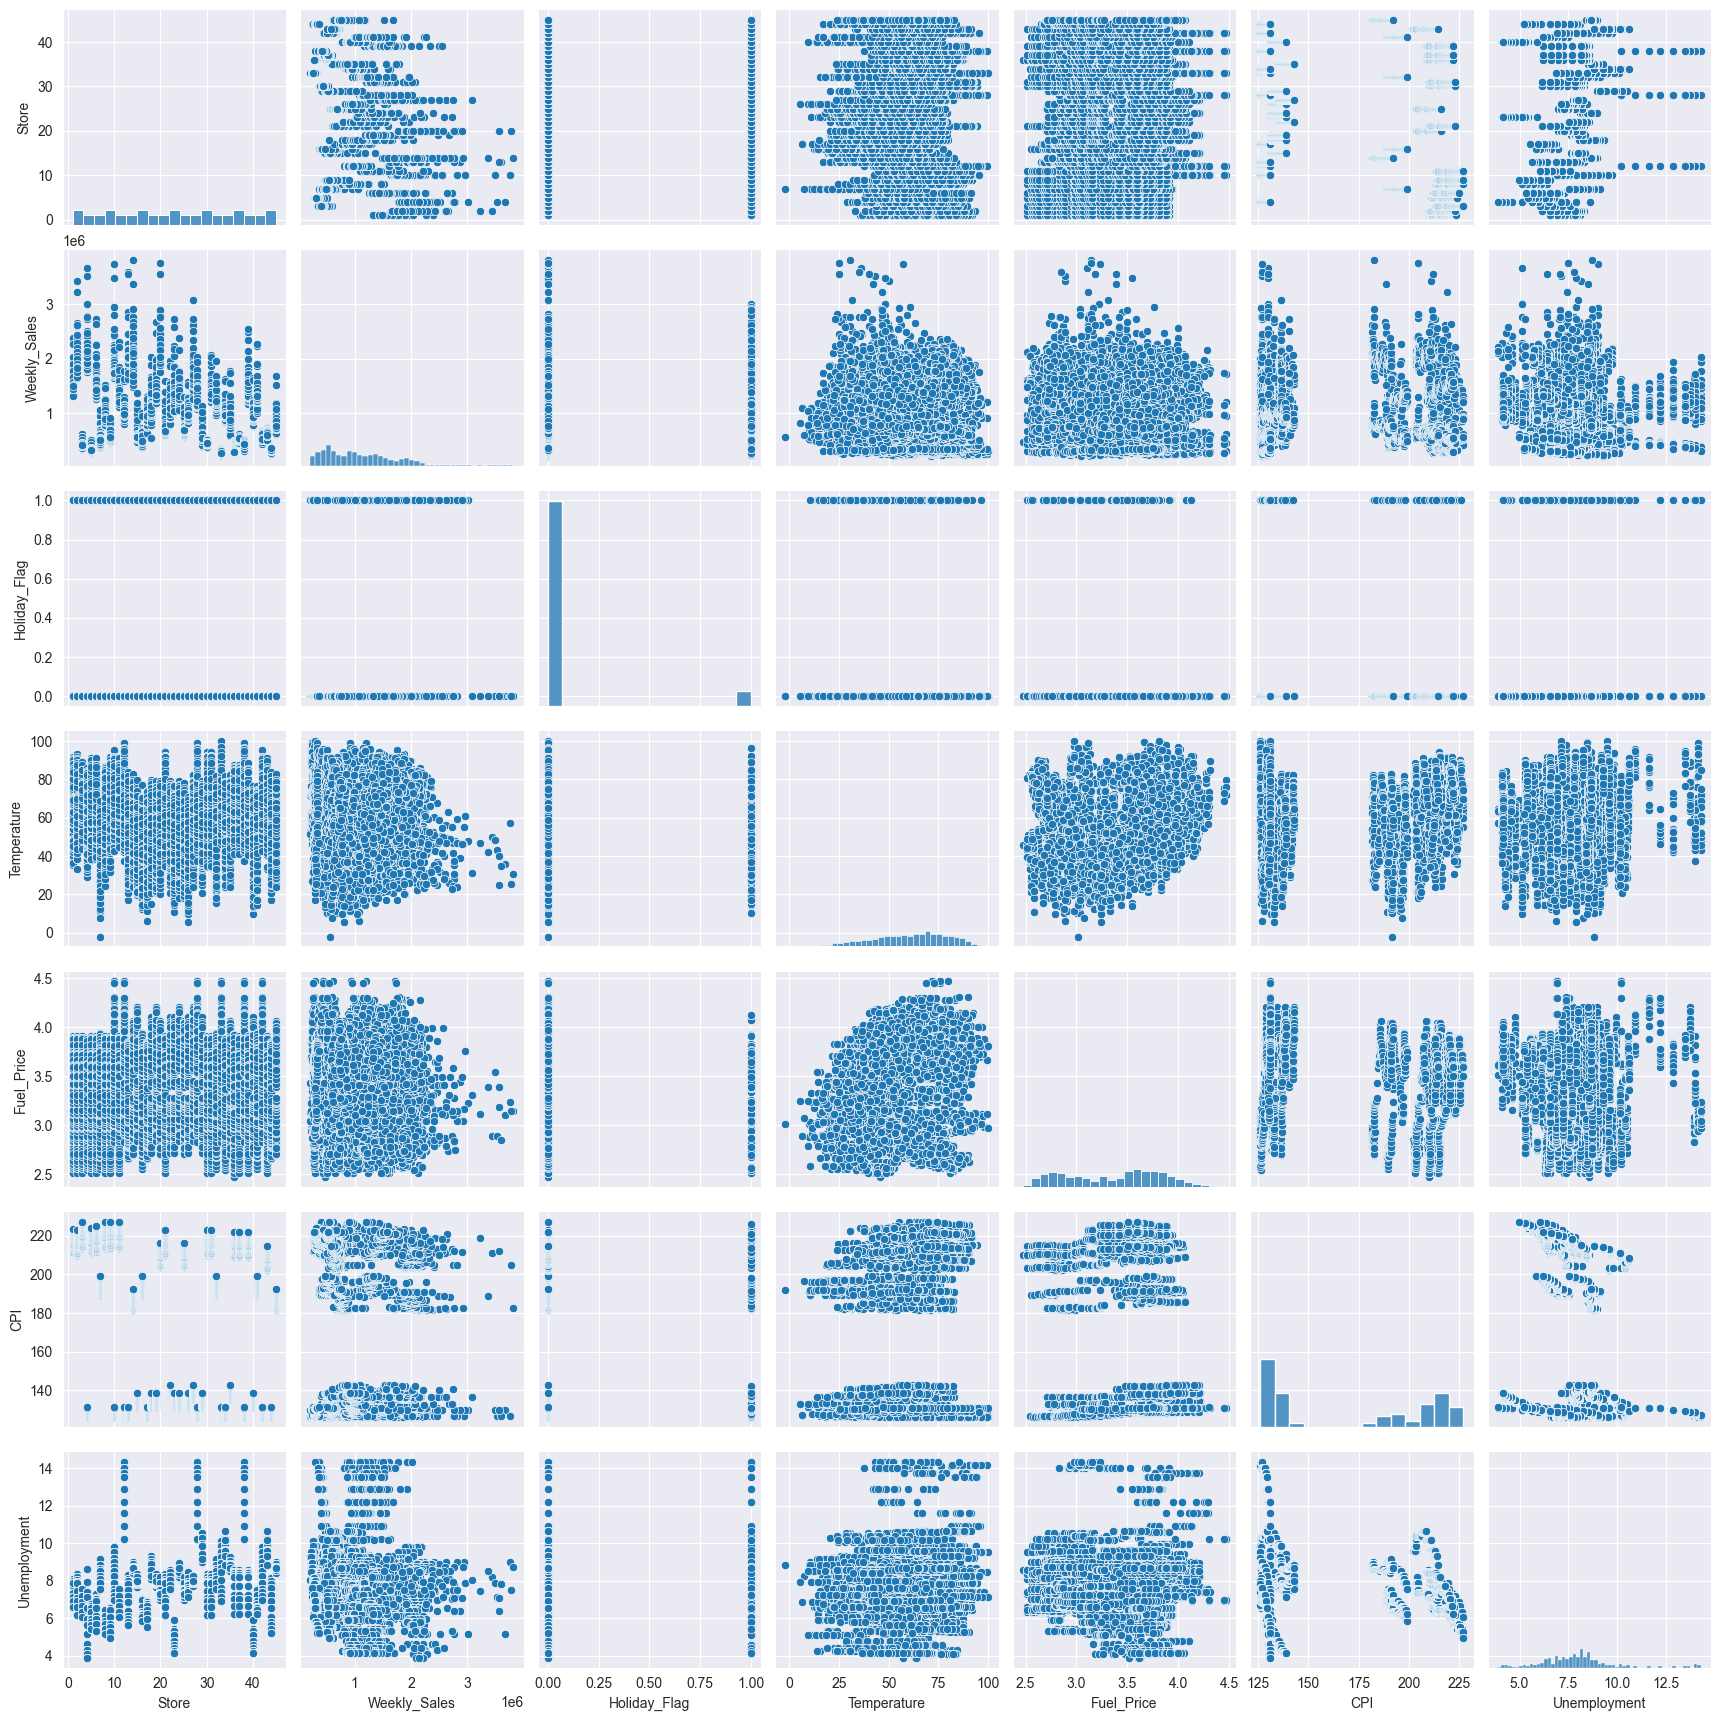

In [172]:
sns.pairplot(data)
plt.show()

`The pairplot does not show any kind of strong linear correlation between two different variables`

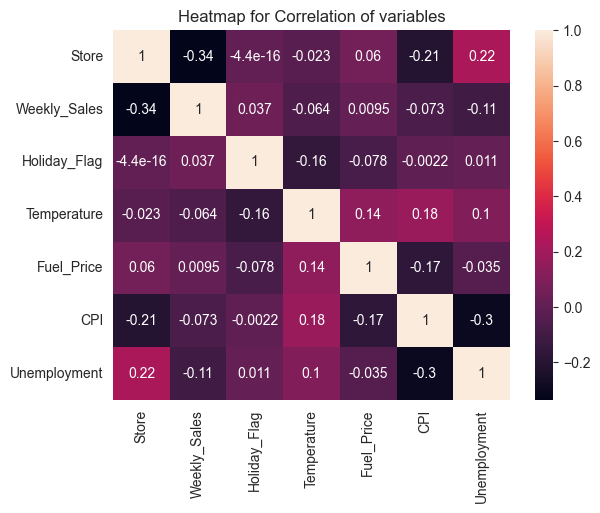

In [173]:
sns.heatmap(data.corr(numeric_only=True),annot = True)
plt.title("Heatmap for Correlation of variables")
plt.show()

`None of the variables are strongly correlated to each other, there is some week correlation present between these variables but they are very week,we can try to capture pattern among these variales in a hstogram plots.`

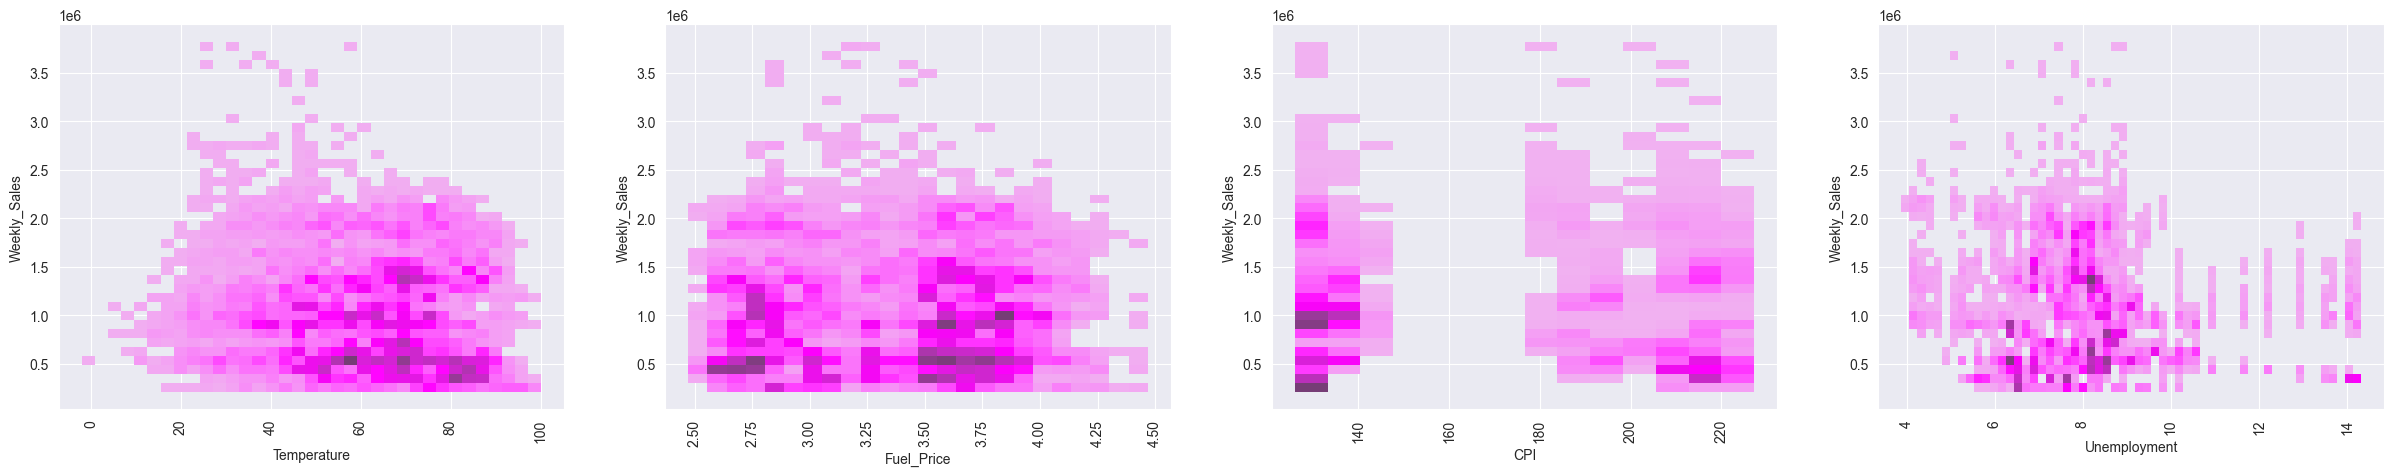

In [174]:
plt.subplots(1,4,figsize = (30,5))
column = column.drop('Weekly_Sales')
for index,cols in enumerate(column):
    plt.subplot(1,4,index+1)
    sns.histplot(y = data['Weekly_Sales'],x=data[cols],color='purple')
    plt.xlabel(cols)
    plt.ylabel('Weekly_Sales')
    plt.xticks(rotation = 90)

There are some patterns that can be seen through the plots of variables in relation to weekly sales.
- Temperature : The amount of weekly sales is high when temperature is low and no. of weekly sales seems to be more because of the darker region observed in the plot.
- Fuel_Price : This variable also follows the same pattern people seem to shop less when the fuel price is high
- CPI : This value represents the inflation and as the CPI is low there are much more sales as compared to higher CPI value
- Unemployment : When the unemployment rate is higher the sale is drastically low.

We will create new features for the dataset namely:
- Week No : the number of week in a particular year
- Weeks to holiday : this represnts the number of weeks after which the holiday will occur
- Weeks from holiday : this represents the number of weeks prior to the last holiday
- Year : The year of the the week.
- Temp_Cat : This is a categorical value for temperature variable which ranges from  0 to 4 where 0 is cold and 4 represents hot.

In [175]:
# Feature Engineering

data['Week_No'] = data.Date.dt.week
data['Year'] = data.Date.dt.year

holiday_df = data.loc[data.Holiday_Flag == 1].sort_values(by = 'Date')[['Date','Week_No']].drop_duplicates().set_index('Date')

def Weeks_to_Holi_Date(data):
    Weeks_to_Holiday = 0
    for i in range(holiday_df.shape[0]):
        current_holi_date = holiday_df.index[i]
        current_holiday_week = holiday_df.loc[current_holi_date].values[0]
        if i == 0:
            if data.Date <= current_holi_date:
                Weeks_to_Holiday = current_holiday_week - data['Week_No']
        else:
            prev_holi_date = holiday_df.index[i - 1]
            if data.Date > prev_holi_date and data.Date <= current_holi_date:
                Weeks_to_Holiday = current_holiday_week - data['Week_No']
                
    return Weeks_to_Holiday

def Weeks_from_Holi_Date(data):
    Weeks_from_Holiday = 0
    for i in range(holiday_df.shape[0]):
        current_holi_date = holiday_df.index[i]
        
        if i == 0:
            if data.Date <= current_holi_date:
                Weeks_from_Holiday = 0
        else:
            prev_holi_date = holiday_df.index[i - 1]
            prev_holiday_week = holiday_df.loc[prev_holi_date].values[0]
            if data.Date > prev_holi_date and data.Date <= current_holi_date:
                Weeks_from_Holiday = abs(prev_holiday_week - data['Week_No'])
                
    return Weeks_from_Holiday

data['Weeks_to_Holiday'] = data.apply(Weeks_to_Holi_Date,axis = 1)
data['Weeks_from_Holiday'] = data.apply(Weeks_from_Holi_Date,axis = 1)

In [176]:
bins = [-3,20,40,60,80,101]
labels = [0,1,2,3,4]
data['Temp_Cat'] = pd.cut(x = data.Temperature,bins = bins, labels = labels)

In [177]:
data.isnull().sum()

Store                 0
Date                  0
Weekly_Sales          0
Holiday_Flag          0
Temperature           0
Fuel_Price            0
CPI                   0
Unemployment          0
Week_No               0
Year                  0
Weeks_to_Holiday      0
Weeks_from_Holiday    0
Temp_Cat              0
dtype: int64

There were no null values and also after the features creation there are no null values in the dataset. Data after feature creation looks like as below.

In [178]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_No,Year,Weeks_to_Holiday,Weeks_from_Holiday,Temp_Cat
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,17,2010,23,0,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,48,2010,0,1,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2010,33,0,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2010,32,0,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,18,2010,22,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,2012,1,11,3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,19,2012,9,33,3
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,50,2012,0,0,2
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,42,2012,0,0,2


## Choosing the Algorithm for the Project,

For this dataset as per the patterns seen in the above plots we might be able to solve it using regression algorithm so we will be trying random forest regressor and as this problems relates to time series we will also try forecasting the sales using Arima and LSTM NN models, based on the different evaluation factor we can select a final model for this problem and try to predict sales for further 12 months

#### Random Forest

In [179]:
Features = ['Store','Holiday_Flag','Fuel_Price','CPI','Unemployment','Weeks_to_Holiday','Weeks_from_Holiday','Temp_Cat']
X = data[Features]
y = data['Weekly_Sales']

print("List of features that we will use for Random Forest Regressor : " , Features)

List of features that we will use for Random Forest Regressor :  ['Store', 'Holiday_Flag', 'Fuel_Price', 'CPI', 'Unemployment', 'Weeks_to_Holiday', 'Weeks_from_Holiday', 'Temp_Cat']


Here I have used Random forest regressor from ensemble of sklearn package the no. of trees I have decided to go with is 500, further using grid search cv the hyperparameter can be tuned. Standard scaler has been used to transform the data to bring all the variables in a similar range and the test size of the data is 20%

In [180]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test = y_scaler.transform(np.array(y_test).reshape(-1,1))
rft = RandomForestRegressor(n_estimators=500)
rft.fit(X_train,y_train)
rft_pred = rft.predict(X_test)

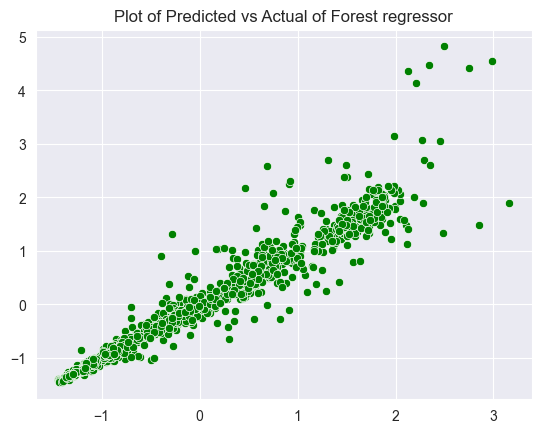

In [181]:
sns.scatterplot(x = rft_pred,y = y_test.flatten(),color = 'Green')
plt.title('Plot of Predicted vs Actual of Forest regressor')
plt.show()

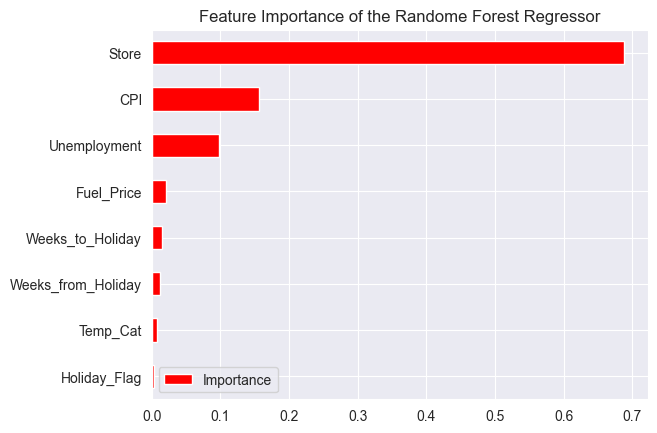

In [182]:
pd.DataFrame(data = rft.feature_importances_,index=Features,columns=['Importance']).sort_values(by='Importance').plot(kind = 'barh',color = 'red')
plt.title('Feature Importance of the Randome Forest Regressor')
plt.show()

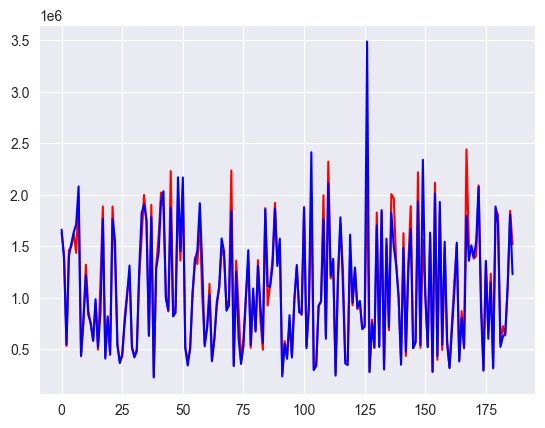

In [183]:
rft_pred = y_scaler.inverse_transform(rft_pred.reshape(-1,1))
y_test = y_scaler.inverse_transform(y_test)
plt.plot(rft_pred[1100:],label='predicted',c='red')
plt.plot(y_test[1100:],label='original',c='blue')
plt.show()

##### Time Series Forecasting using Arima Model

We can also perform univariate time series forecasting model on the Weekly_sales using ARIMA and deep Neural network LSTM.

- Data is available for 45 different stores and we need to forecast sales for each store individually.
- There are 0 null values for all the variables present in the dataset.
- There are outliers present in the weekly_sales variable but according to the time series analysis during the holiday weeks the sales increase drastically for each store and these outliers might be caused due to that, so we are not performing any operation on the outliers.
- Created a function named store_data that can fetch Weekly_Sales for a given store number. 
store_data(4)

Going further with the time series analysis we need to check if the given time series is stationary or not, for this purpose we will be using adfuller test, according to this test we come up with two hypothesis Null Hypothesis(NH) and Alternate Hypothesis(AH)

- NH : Time Series is not stationary
- AH : Time Series is stationary

Once the test is conducted we get a pvalue, this p value can then be compared with the significance threshold and basis on that a time series can be declared as stationary or non stationary.

- Accept Null Hypothesis if p_value > 0.05
- Reject Null Hypothesis if p_value < 0.05

In [184]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_No,Year,Weeks_to_Holiday,Weeks_from_Holiday,Temp_Cat
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,17,2010,23,0,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,48,2010,0,1,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2010,33,0,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2010,32,0,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,18,2010,22,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,2012,1,11,3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,19,2012,9,33,3
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,50,2012,0,0,2
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,42,2012,0,0,2


In [185]:
from statsmodels.tsa.stattools import adfuller

#del Store_1

data = data.set_index('Date')

for i in range(1,46):
    globals()[f"Store_{i}"] = data.loc[(data['Store'] == i)]["Weekly_Sales"]
    
# def store_data(storenum):
#     X = data.loc[(data['Store'] == storenum)]['Weekly_Sales']       # Function to return data for a specific store
#     return X
    
    
for i in range(1,46):
    pval = adfuller(globals()[f"Store_{i}"])[1]
#   print(f"Pvalue according to adfuller test for Store_{i} is : ",pval)
    if pval > 0.05:
        print(f"Store_{i} Accepting Null Hypothesis: Time Series is not stationary")
    else:
        pass
#        print(f"Store_{i} Rejecting Null Hypothesis: Time Series is stationary")

Store_14 Accepting Null Hypothesis: Time Series is not stationary
Store_30 Accepting Null Hypothesis: Time Series is not stationary
Store_36 Accepting Null Hypothesis: Time Series is not stationary
Store_38 Accepting Null Hypothesis: Time Series is not stationary
Store_42 Accepting Null Hypothesis: Time Series is not stationary
Store_43 Accepting Null Hypothesis: Time Series is not stationary
Store_44 Accepting Null Hypothesis: Time Series is not stationary


There are very less number of stores that have a non-stationary time series we can compare the seasonal decompose of one of the non-stationary data and one of the stationary data

In [186]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose

- Seasonal decompose of store 4 (Stationary)

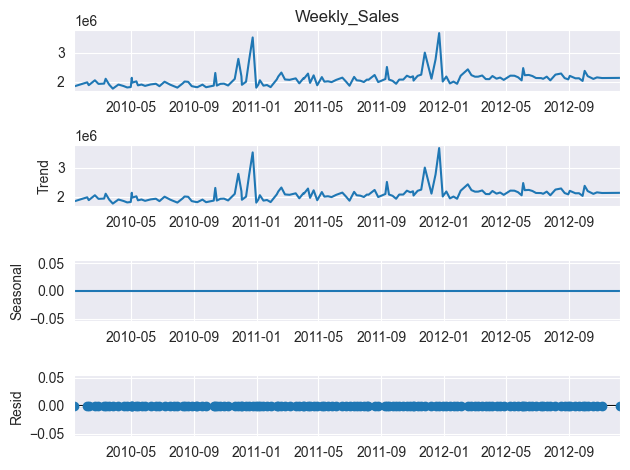

In [187]:
dec_r=seasonal_decompose(Store_4.sort_index(),model='addidtive',period = 1)
dec_r.plot()
plt.show()

- Seasonal decompose of store 36 (Non - Stationary)

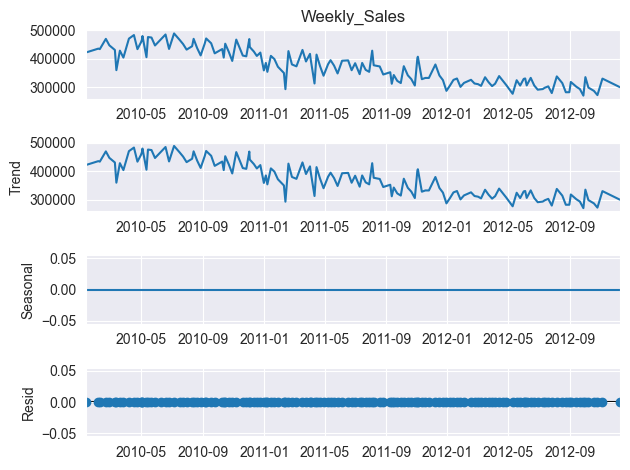

In [188]:
dec_r=seasonal_decompose(Store_36.sort_index(),period=1)
dec_r.plot()
plt.show()

To make a time series stationary we have to do seasonal differencing.

In [189]:
diff_stor36 = Store_36.diff().dropna().sort_index()
pval = adfuller(diff_stor36)[1]
print("Pvalue according to adfuller test for store 36 after one differetiation is : ",pval)
if pval > 0.05:
    print("Accepting Null Hypothesis: Time Series is not stationary")
else:
    print("Rejecting Null Hypothesis: Time Series is stationary")

Pvalue according to adfuller test for store 36 after one differetiation is :  3.306705316836001e-07
Rejecting Null Hypothesis: Time Series is stationary


- Seasonal decompose of differenced store 36 (Stationary)

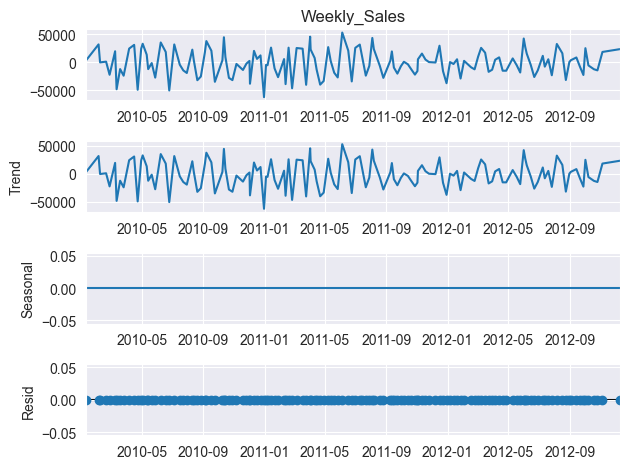

In [190]:

decom = seasonal_decompose(diff_stor36,period = 1)
decom.plot()
plt.show()

- Auto Corelation of Store 4 (Stationary)

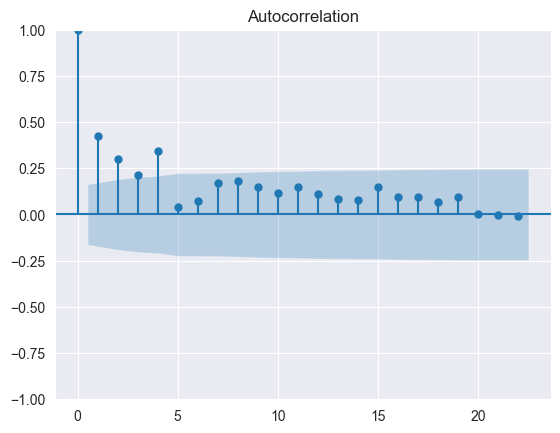

In [191]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(Store_4)
plt.show()

- Auto Corelation of differenced Store 36 (Stationary)

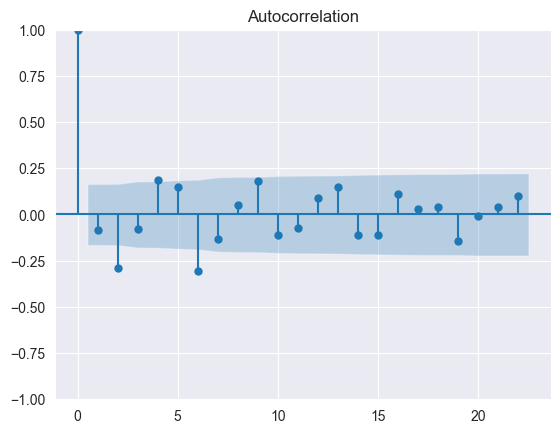

In [192]:
plot_acf(diff_stor36)
plt.show()

- Partial Auto Corelation of Store 4 (Stationary)

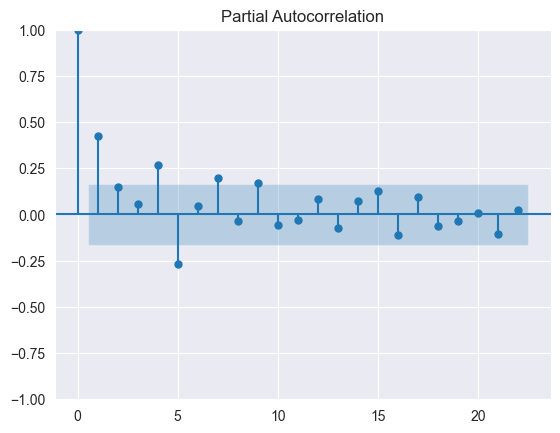

In [193]:
plot_pacf(Store_4)
plt.show()

- Partial Auto Corelation of differenced Store 36 (Stationary)

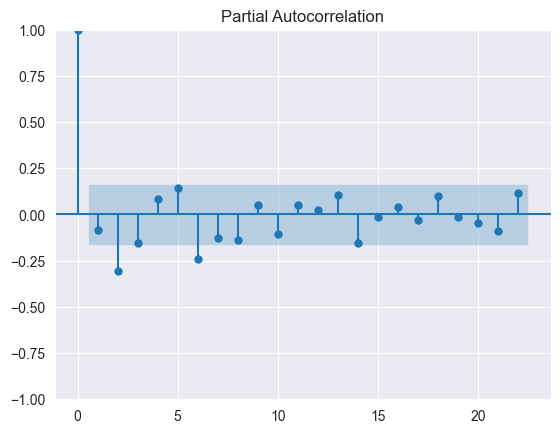

In [194]:
plot_pacf(diff_stor36)
plt.show()

Model being used is  **ARIMA(Auto Regressive Integrated Moving Average)** model which requires order p,d,q to learn from data and forecast the future.
- p : is the order of Auto Regressor
- d : is the order of diferencing
- q : is the order of Moving Average

The Partial Auto correlation plot and Auto Corelation plot are used to find the p and q orders respectively, we can also use auto arima to figure out the order of the time series which we will be using for this problem.

In [195]:
from pmdarima import auto_arima
from statsmodels.tsa import arima

auto_arima(Store_4.sort_index())

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [196]:
p = 2
d = 1
q = 2


train = Store_4[:138]
test = Store_4[138:]
model=ARIMA(train,order=(p,d,q))
model_fit = model.fit()
pred = model_fit.forecast(143-138)

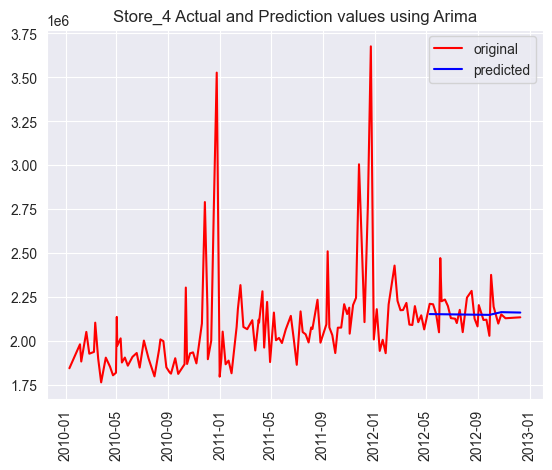

In [197]:
#train.index = train.index.to_timestamp()
pred.index = test.index
plt.Figure(figsize = (35,7))
plt.plot(Store_4.sort_index(),label='original',c='red')
plt.plot(pred.sort_index(),label='predicted',c='blue')
plt.title('Store_4 Actual and Prediction values using Arima')
plt.xticks(rotation=90)
plt.legend()
plt.show()

##### Time Series Forecasting using LSTM Model

In [198]:
X = []
y = np.array(Store_36[3:])


X_stand_scaler = StandardScaler()
y_stand_scaler = StandardScaler()

y = y_stand_scaler.fit_transform(y.reshape(-1,1))

for i in range(0,Store_36.shape[0]-3):
   X.append(np.array(Store_36[i:i+3]))
X = np.array(X)
X = X_stand_scaler.fit_transform(X)
X = X.reshape(X.shape[0],X.shape[1],1)


X_train = X[:int(X.shape[0]*0.9)]
X_val = X[int(X.shape[0]*0.9):]

y_train = y[:int(y.shape[0]*0.9)]
y_val = y[int(y.shape[0]*0.9):]

X_train.shape,X_val.shape,y_train.shape,y_val.shape

((126, 3, 1), (14, 3, 1), (126, 1), (14, 1))

In [199]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,LSTM,Dropout,RNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1

In [200]:
model = Sequential()
model.add(Input(shape=(3,1)))
model.add(LSTM(100))
model.add(Dense(3,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001),loss='mse',metrics=['mean_absolute_error'])
model.fit(X_train,y_train,epochs=50,validation_data=(X_val, y_val),verbose=0)

2023-02-21 21:46:18.344236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-21 21:46:18.525915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-21 21:46:18.628782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-21 21:46:18.947171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-21 21:46:18.989065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


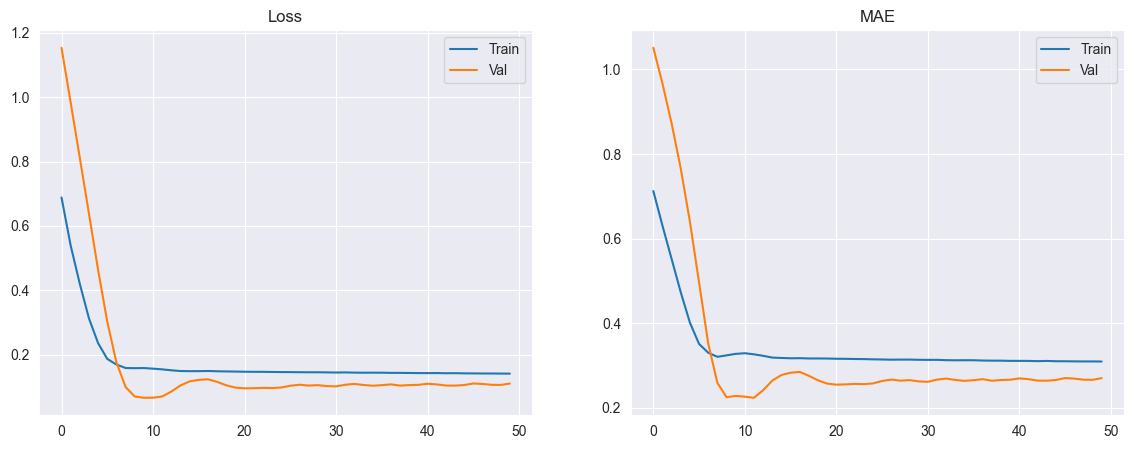

In [201]:
import matplotlib.pyplot as plt

metrics_training = model.history.history
fig = plt.subplots(1,2,figsize=(14,5))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(metrics_training['loss'])
plt.plot(metrics_training['val_loss'])
#plt.ylim(0,25)
plt.legend(['Train','Val'])


plt.subplot(1,2,2)
plt.title('MAE')
plt.plot(metrics_training['mean_absolute_error'])
plt.plot(metrics_training['val_mean_absolute_error'])
#plt.ylim(0,1)
plt.legend(['Train','Val'])
plt.show()

In [202]:
lstm_pred = model.predict(X_val)
lstm_pred = y_stand_scaler.inverse_transform(lstm_pred)
lstm_pred = lstm_pred.flatten()
y_val = y_stand_scaler.inverse_transform(y_val)

1/1 [==============================] - 0s 208ms/step


2023-02-21 21:46:21.556633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-21 21:46:21.591297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


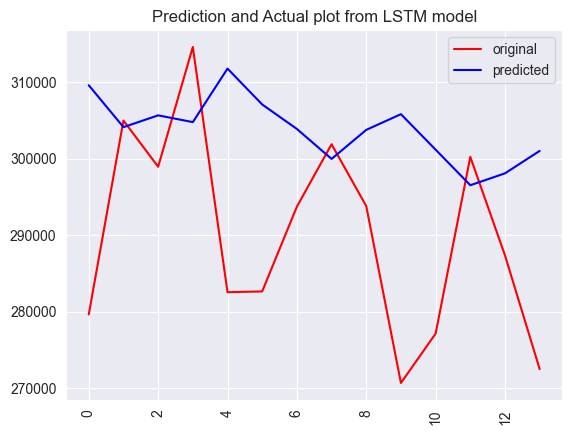

In [203]:
plt.Figure(figsize = (35,7))
plt.plot(y_val,label='original',c='red')
plt.plot(lstm_pred,label='predicted',c='blue')
plt.xticks(rotation=90)
plt.title('Prediction and Actual plot from LSTM model')
plt.legend()
plt.show()

## Assumptions

- Created two features assuming that weeks that are further from holiday sales might have less sales as compared to the ones that are near to the holidays.
- Converted Temerature in each week to category without any knowledge of how the stack holders may treat the weather conditions in given week.
- For LSTM and ARIMA model considered that previous week sales have a effect on coming week sales and other variables provided have no effect on the weekly sales.
- Did not scaled data for ARIMA model

## Model Evaluation and Techniques

In [204]:
rft_mse = mean_squared_error(rft_pred,y_test)
arima_mse = mean_squared_error(pred,test)
lstm_mse = mean_squared_error(lstm_pred,y_val)

rft_rmse = np.sqrt(rft_mse)
arima_rmse = np.sqrt(arima_mse)
lstm_rmse = np.sqrt(lstm_mse)

r2_rft = r2_score(y_test,rft_pred)
r2_arima = r2_score(pred,test)
r2_lstm = r2_score(lstm_pred,y_val)


Evaluation = pd.DataFrame([[rft_mse,arima_mse,lstm_mse],
                          [rft_rmse,arima_rmse,lstm_rmse],
                          [r2_rft,r2_arima,r2_lstm]],
                          columns = ['Random Forest','ARIMA','LSTM'],
                          index=['MSE','RMSE','R squared Score']
                          )

Evaluation.T

,MSE,RMSE,R squared Score
Random Forest,2.454528e+10,156669.336359,0.926340
ARIMA,4.458145e+09,66769.338099,-132.457553
LSTM,3.895917e+08,19738.076560,-22.559667


## Inferences from the Same

From the Prediction vs Actual plots and the above evaluation table we can clearly see that Random Forest is performing best for this dataset, rsquared score is 0.92 that means the model is able to explain 92% of variance in the dependent and independent variable. So we will be using random forest for an example to predict future sales of 12 weeks for Store 1.

In [205]:
Store_1 = data.loc[data.Store == 1]

#Store_1 = Store_1.set_index('Date')
Store_1 = Store_1.sort_index()


X_eval = Store_1[Features]
y_eval = Store_1['Weekly_Sales']

X_eval = scaler.transform(X_eval)

y_hat = rft.predict(X_eval)
final_y_hat = y_scaler.inverse_transform(y_hat.reshape(-1,1))
Store_1

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_No,Year,Weeks_to_Holiday,Weeks_from_Holiday,Temp_Cat
Date,,,,,,,,,,,,
2010-01-10,1,1453329.50,0,71.89,2.603,211.671989,7.838,1,2010,39,0,3
2010-02-04,1,1594968.28,0,62.27,2.719,210.820450,7.808,5,2010,35,0,3
2010-02-07,1,1492418.14,0,80.91,2.669,211.223533,7.787,5,2010,35,0,4
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,7,2010,33,0,1
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,8,2010,32,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-08,1,1592409.97,0,85.05,3.494,221.958433,6.908,41,2012,0,0,4
2012-10-19,1,1508068.77,0,67.97,3.594,223.425723,6.573,42,2012,0,0,3
2012-10-26,1,1493659.74,0,69.16,3.506,223.444251,6.573,43,2012,0,0,3


In [206]:
y_eval.index = Store_1.index 
y_hat = pd.Series(final_y_hat.flatten(),index=Store_1.index)

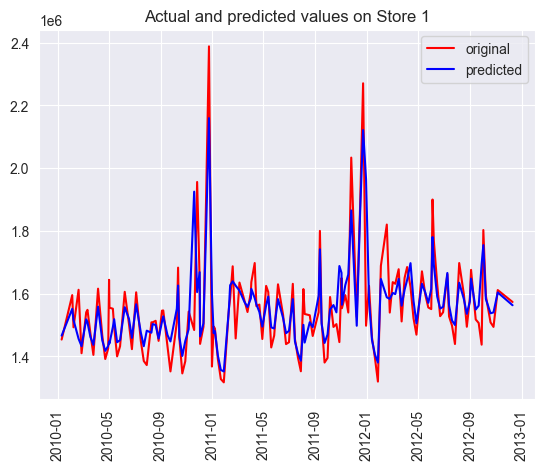

In [207]:

plt.plot(y_eval,label='original',c='red')
plt.plot(y_hat,label='predicted',c='blue')
plt.xticks(rotation = 90)
plt.title('Actual and predicted values on Store 1')
plt.legend()
plt.show()

Creating a assumed dataset for next 12 weeks with required variables using the past data available, so for each week present in the new dataframe we will we taking mean of the data availabe for last 2 year. and we come up with a new dataframe with required features to predict the future sales for Store 1

In [208]:
prediction_df = pd.DataFrame(pd.date_range(start='2012-12-10', periods = 12,freq="7D"),columns=['Date'])
prediction_df['Week_No'] = prediction_df.Date.dt.week
prediction_df['Year'] = prediction_df.Date.dt.year

Holiday_flag = []
Fuel_price = []
CPI = []
Unemployment = []
Temp_cat = []

for week in prediction_df.Week_No:
    Holiday_flag.append(int(Store_1.query('Week_No == @week')['Holiday_Flag'].mean()))
    Fuel_price.append(Store_1.query('Week_No == @week')['Fuel_Price'].mean())
    CPI.append(Store_1.query('Week_No == @week')['CPI'].mean())
    Unemployment.append(Store_1.query('Week_No == @week')['Unemployment'].mean())
    Temp_cat.append(Store_1.query('Week_No == @week')['Temp_Cat'].values.max())

prediction_df['Holiday_Flag'] = Holiday_flag
prediction_df['Fuel_Price'] = Fuel_price
prediction_df['CPI'] = CPI
prediction_df['Unemployment'] = Unemployment

holiday_df = prediction_df.loc[prediction_df.Holiday_Flag == 1].sort_values(by = 'Date')[['Date','Week_No']].drop_duplicates().set_index('Date')

prediction_df['Weeks_to_Holiday'] = prediction_df.apply(Weeks_to_Holi_Date,axis = 1)
prediction_df['Weeks_from_Holiday'] = prediction_df.apply(Weeks_from_Holi_Date,axis = 1)
prediction_df['Store'] = [1,1,1,1,1,1,1,1,1,1,1,1]
prediction_df['Temp_Cat'] = Temp_cat

prediction_df

,Date,Week_No,Year,Holiday_Flag,Fuel_Price,CPI,Unemployment,Weeks_to_Holiday,Weeks_from_Holiday,Store,Temp_Cat
0,2012-12-10,50,2012,0,3.209667,217.988687,7.425667,2,0,1,3
1,2012-12-17,51,2012,0,2.999000,215.381422,7.852000,1,0,1,2
2,2012-12-24,52,2012,1,3.036000,215.470461,7.852000,0,0,1,2
3,2012-12-31,1,2012,0,3.288000,215.860127,7.656250,0,0,1,4
4,2013-01-07,2,2013,0,3.122000,215.674969,7.545000,0,0,1,2
5,2013-01-14,3,2013,0,3.142000,215.906462,7.545000,0,0,1,2
6,2013-01-21,4,2013,0,3.150000,216.137955,7.545000,0,0,1,2
7,2013-01-28,5,2013,0,3.006000,214.297343,7.647667,0,0,1,4
8,2013-02-04,6,2013,0,3.352500,217.255937,7.914000,0,0,1,4
9,2013-02-11,7,2013,0,3.023000,214.987596,7.732000,0,0,1,2


In [209]:
X_prediction = prediction_df[Features]
X_prediction = scaler.transform(X_prediction)
predictions = rft.predict(X_prediction)
predictions = y_scaler.inverse_transform(predictions.reshape(-1,1))
prediction_df['Weekly_Sales'] = predictions

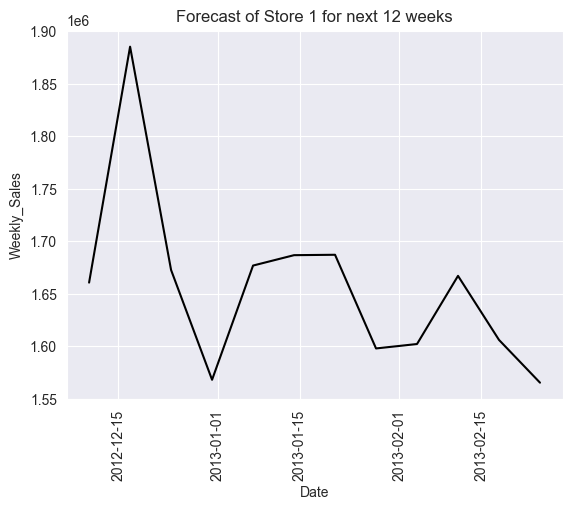

In [210]:

sns.lineplot(x = prediction_df['Date'],y = prediction_df['Weekly_Sales'],color = 'black')
plt.xticks(rotation = 90)
plt.title('Forecast of Store 1 for next 12 weeks')
plt.show()

There is seasonality in the data where every year at the end of it the sales is maximum and it dips down for the next couple of moths which can be seen in the prediction as well.

## Future Possibilities of the Project

- More amount of data can be gathered in for further analysis and capturing even more patterns that affects the sales of the stores.
- Product wise data can be collected to even predict the stocks requirements of store.
- This model can be used to create a dashboard to see the reqular weekly sales and also the future forcast for stakeholders to bring in more investments for stocks when required.
- This model can be deployed on cloud or inhouse server if present using flask package available for python.

## Refrences


- https://www.kaggle.com/code/tzlw1931/tsf-with-xgboost-rf-et
- https://towardsdatascience.com/how-to-bin-numerical-data-with-pandas-fe5146c9dc55
- https://medium.com/analytics-vidhya/walmart-sales-forecasting-d6bd537e4904
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html
- https://pandas.pydata.org/docs/user_guide/timeseries.html

In [218]:
import joblib
import os
joblib.dump(rft, "RF_Walmart.joblib", compress=9)
print(f"Random Forest Model dump : {np.round(os.path.getsize('RF_Walmart.joblib') / 1024 / 1024, 2) } MB")

Random Forest Model dump : 57.78 MB
